In [2]:
#https://stackoverflow.com/questions/12919980/nohup-is-not-writing-log-to-output-file
# nohup python -u ./gte.py > gte.log &
%load_ext autoreload
%autoreload 2
import os, sys
import time
import math
import glob

import matplotlib
#matplotlib.use('qt5agg')
#matplotlib.use('agg')
#%matplotlib
import matplotlib
import matplotlib.pyplot as plt

In [11]:
import pickle

model_dir = 'vnmt_finetune_1-gru_afterbugfix_same_12182017'
with open('%s/kld_stats.pkl'%model_dir, 'rb') as f:
    kld_stats = pickle.load(f)
    
#print(kld_stats)

<class 'list'>
83.63246154785156
261.4575500488281


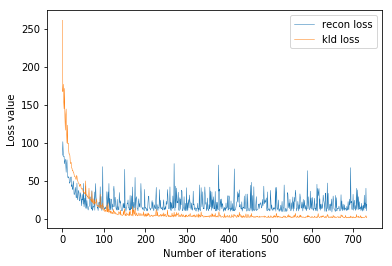

In [12]:
import matplotlib
import matplotlib.pyplot as plt

max_iter=734

nlls = kld_stats['nll']
kld_values = kld_stats['kld_values']
kld_weights = kld_stats['kld_weights']
print(type(nlls))
print( float(nlls[0][-1]))
print( float(kld_values[0][-1]))
nlls = [i[0] for i in nlls[:max_iter] ]
kld_values = [i[0] for i in kld_values[:max_iter] ]

plt.clf()
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
plt.plot(nlls, label='recon loss', linewidth=0.5)
plt.plot(kld_values, label='kld loss', linewidth=0.5)
ax.legend()
plt.xlabel('Number of iterations') # num of batches
plt.ylabel('Loss value')
#plt.savefig(filename)
plt.show()

dict_keys(['nll', 'kld_values', 'kld_weights'])
dict_keys(['nll', 'kld_values', 'kld_weights'])


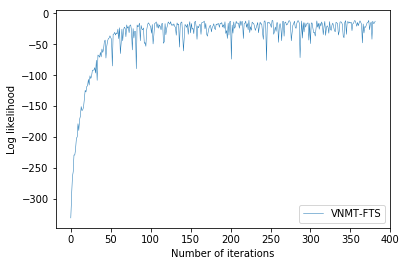

In [20]:
print(kld_stats.keys())

ll_fts = []
for i, nll in enumerate(nlls[:max_iter]):
    if i < 30 or i >=30 and i%2==0:
        kld = kld_values[i]
        ll_fts.append(-(nll+kld))

model_dir = 'vnmt_finetune_rev?_afterbugfix_12122017'
with open('%s/kld_stats.pkl'%model_dir, 'rb') as f:
    kld_stats = pickle.load(f)
print(kld_stats.keys())
nlls = kld_stats['nll']
kld_values = kld_stats['kld_values']
kld_weights = kld_stats['kld_weights']
nlls = [i[0] for i in nlls[:max_iter] ]
kld_values = [i[0] for i in kld_values[:max_iter] ]
ll_ftr = []
for i, nll in enumerate(nlls[:max_iter]):
    if i < 30 or i >=30 and i%2==0:
        kld = kld_values[i]
        ll_ftr.append(-(nll+kld))

plt.clf()
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
plt.plot(ll_fts, label='VNMT-FTS', linewidth=0.5)
#plt.plot(ll_ftr, label='VNMT-FTR', linewidth=0.5)
ax.legend()
plt.xlabel('Number of iterations') # num of batches
plt.ylabel('Log likelihood')
#plt.savefig(filename)
plt.show()

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       11.8 (0.4/*/-)         18.0 (0.2/*/-)         74.3 (0.4/*/-)         74.0 (0.6/*/-)         
system 1       11.0 (0.3/*/**)        17.1 (0.2/*/**)        74.9 (0.4/*/**)        72.1 (0.6/*/**)        
system 2       12.5 (0.4/*/**)        18.1 (0.2/*/**)        74.1 (0.4/*/**)        74.9 (0.6/*/**)

len5

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       7.3 (1.3/*/-)          16.5 (2.2/*/-)         77.0 (5.0/*/-)         73.9 (5.4/*/-)         
system 1       7.5 (1.2/*/**)         15.4 (2.0/*/**)        80.0 (4.7/*/**)        78.8 (5.9/*/**)        
system 2       7.8 (1.3/*/**)         16.4 (2.2/*/**)        78.8 (5.4/*/**)        79.4 (6.1/*/**)    

len10

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       12.3 (0.8/*/-)         19.4 (0.4/*/-)         72.8 (0.8/*/-)         76.9 (1.0/*/-)         
system 1       11.2 (0.7/*/**)        18.1 (0.4/*/**)        73.4 (0.7/*/**)        73.8 (1.0/*/**)        
system 2       12.7 (0.7/*/**)        18.8 (0.4/*/**)        72.7 (0.8/*/**)        75.8 (1.0/*/**) 

len 15

Performed approximate randomization in 3.52 s
n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       13.4 (0.6/*/-)         19.5 (0.3/*/-)         72.5 (0.8/*/-)         76.6 (0.9/*/-)         
system 1       12.3 (0.6/*/**)        18.5 (0.3/*/**)        72.9 (0.6/*/**)        73.8 (0.9/*/**)        
system 2       14.2 (0.6/*/**)        19.6 (0.3/*/**)        71.8 (0.7/*/**)        76.8 (0.9/*/**) 

len 20

Performed approximate randomization in 1.48 s
n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       12.1 (0.8/*/-)         17.2 (0.4/*/-)         74.7 (0.9/*/-)         72.2 (1.2/*/-)         
system 1       11.0 (0.7/*/**)        16.4 (0.4/*/**)        75.7 (0.8/*/**)        70.4 (1.2/*/**)        
system 2       12.1 (0.7/*/**)        17.3 (0.4/*/**)        75.2 (0.8/*/**)        74.3 (1.3/*/**)   

len 25

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       9.6 (0.8/*/-)          16.1 (0.5/*/-)         77.1 (1.0/*/-)         70.3 (1.7/*/-)         
system 1       9.7 (0.8/*/**)         15.8 (0.5/*/**)        77.6 (1.0/*/**)        70.8 (1.7/*/**)        
system 2       11.1 (0.8/*/**)        16.5 (0.5/*/**)        76.7 (1.0/*/**)        73.3 (1.7/*/**) 

len 30

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       6.1 (1.1/*/-)          13.6 (0.8/*/-)         82.2 (1.4/*/-)         68.4 (3.2/*/-)         
system 1       6.9 (1.1/*/**)         13.7 (0.7/*/**)        81.2 (1.6/*/**)        67.8 (3.3/*/**)        
system 2       8.8 (1.3/*/**)         15.0 (0.8/*/**)        80.3 (1.6/*/**)        70.6 (3.3/*/**)  

len 35

baseline       5.4 (1.7/*/-)          13.0 (1.5/*/-)         77.0 (2.6/*/-)         54.1 (4.2/*/-)         
system 1       3.5 (1.3/*/**)         11.0 (1.5/*/**)        83.3 (2.5/*/**)        58.0 (5.2/*/**)        
system 2       3.8 (1.3/*/**)         11.5 (1.3/*/**)        81.6 (2.5/*/**)        57.0 (4.7/*/**)   

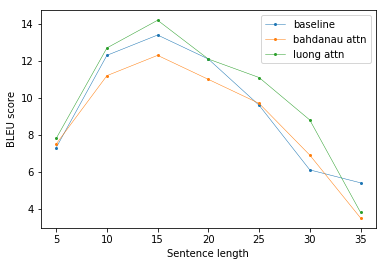

In [21]:
# 585
x = [5,10,15,20,25,30,35]
baseline = [7.3, 12.3, 13.4, 12.1, 9.6, 6.1, 5.4]
bah = [7.5, 11.2, 12.3, 11.0, 9.7, 6.9, 3.5]
luo = [7.8, 12.7, 14.2, 12.1, 11.1, 8.8, 3.8]

plt.clf()
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()

plt.plot(x, baseline, label='baseline', linewidth=0.5, marker='o', markersize=2)
plt.plot(x, bah, label='bahdanau attn', linewidth=0.5, marker='o', markersize=2)
plt.plot(x, luo, label='luong attn', linewidth=0.5, marker='o', markersize=2)

ax.legend()
plt.xlabel('Sentence length') # num of batches
plt.ylabel('BLEU score')

plt.savefig('bleu_lengths_585.eps')

plt.show()

len=5

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       10.2 (2.7/*/-)         20.9 (2.1/*/-)         63.6 (4.9/*/-)         94.5 (5.5/*/-)         
system 1       10.6 (3.3/*/**)        19.4 (2.4/*/**)        70.9 (6.9/*/**)        104.8 (6.8/*/**)       
system 2       8.0 (2.6/*/**)         18.0 (2.0/*/**)        73.9 (6.6/*/**)        101.8 (7.4/*/**)    

len=10

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       15.3 (0.9/*/-)         22.1 (0.4/*/-)         64.5 (0.9/*/-)         91.3 (1.2/*/-)         
system 1       15.3 (0.8/*/**)        21.6 (0.4/*/**)        67.5 (1.0/*/**)        97.3 (1.2/*/**)        
system 2       15.6 (0.9/*/**)        21.6 (0.4/*/**)        68.1 (1.1/*/**)        97.6 (1.4/*/**)        

len=15

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       15.7 (0.7/*/-)         21.3 (0.3/*/-)         65.6 (0.8/*/-)         88.2 (1.1/*/-)         
system 1       15.8 (0.7/*/**)        21.6 (0.3/*/**)        67.7 (0.8/*/**)        94.9 (1.1/*/**)        
system 2       15.3 (0.7/*/**)        21.4 (0.3/*/**)        67.9 (0.8/*/**)        94.4 (1.1/*/**)    

len=20

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       14.0 (0.8/*/-)         19.3 (0.4/*/-)         68.6 (0.9/*/-)         84.4 (1.4/*/-)         
system 1       13.4 (0.8/*/**)        19.1 (0.4/*/**)        70.2 (0.9/*/**)        88.9 (1.4/*/**)        
system 2       13.4 (0.8/*/**)        18.9 (0.4/*/**)        70.4 (1.0/*/**)        89.0 (1.4/*/**)          

len=25

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       12.0 (0.9/*/-)         18.2 (0.5/*/-)         71.9 (1.3/*/-)         84.4 (2.0/*/-)         
system 1       12.4 (0.9/*/**)        18.5 (0.5/*/**)        72.4 (1.2/*/**)        88.1 (2.0/*/**)        
system 2       12.8 (1.0/*/**)        18.5 (0.5/*/**)        72.9 (1.4/*/**)        88.6 (2.1/*/**)   

len=30

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       7.3 (1.2/*/-)          15.8 (0.7/*/-)         77.2 (2.3/*/-)         80.0 (4.0/*/-)         
system 1       9.2 (1.4/*/**)         16.4 (0.8/*/**)        78.0 (1.9/*/**)        83.9 (3.8/*/**)        
system 2       9.7 (1.5/*/**)         16.6 (0.8/*/**)        77.9 (1.9/*/**)        83.5 (3.9/*/**)     

len=35

n=1            BLEU (s_sel/s_opt/p)   METEOR (s_sel/s_opt/p) TER (s_sel/s_opt/p)    Length (s_sel/s_opt/p) 
baseline       5.3 (1.9/*/-)          12.6 (1.4/*/-)         75.4 (2.8/*/-)         62.3 (4.7/*/-)         
system 1       3.5 (1.4/*/**)         11.0 (1.1/*/**)        81.3 (2.4/*/**)        66.9 (6.3/*/**)        
system 2       4.9 (1.9/*/**)         12.9 (1.4/*/**)        78.4 (3.0/*/**)        66.9 (5.7/*/**)     

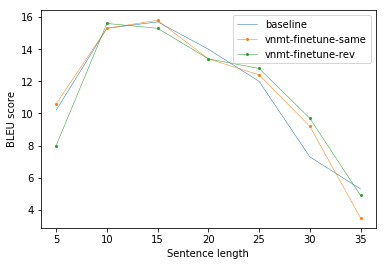

In [22]:
# 682, VNMT
x = [5,10,15,20,25,30,35]
baseline = [10.2, 15.3, 15.7, 14.0, 12.0, 7.3, 5.3]
#finetune_same = [6.0, 13.1, 14.0, 12.1, 9.8, 8.3, 3.5] # after first epoch
finetune_same = [10.6, 15.3, 15.8, 13.4, 12.4, 9.2, 3.5]
finetune_rev = [8.0, 15.6, 15.3, 13.4, 12.8, 9.7, 4.9]

plt.clf()
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()

plt.plot(x, baseline, label='baseline', linewidth=0.5)
plt.plot(x, finetune_same, label='vnmt-finetune-same', linewidth=0.5, marker='o', markersize=2)
plt.plot(x, finetune_rev, label='vnmt-finetune-rev', linewidth=0.5, marker='o', markersize=2)

ax.legend()
plt.xlabel('Sentence length') # num of batches
plt.ylabel('BLEU score')

plt.savefig('bleu_lengths_682.eps')

plt.show()